In [1]:
from data import colorize_image as CI
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# load images
imgs2read = open('imgs2read.txt', 'r')
allimgs2read = []
for line in imgs2read:
    line = line.strip()
    line = line.split()
    for img in line:
        if '-targets' in img:
            img = img.replace('-targets.png', '')
            allimgs2read.append(img)

# Choose gpu to run the model on
gpu_id = 0

# Initialize colorization class
colorModel = CI.ColorizeImageCaffe(Xd=256)

# Load the model
colorModel.prep_net(gpu_id,'./models/reference_model/deploy_nodist.prototxt','./models/reference_model/model.caffemodel')


ColorizeImageCaffe instantiated
gpu_id = 0, net_path = ./models/reference_model/deploy_nodist.prototxt, model_path = ./models/reference_model/model.caffemodel


photo-1481068164146-e8beb686f4d2
photo-1491759683820-492a6de5504c
dcc2ccd9
photo-1498842812179-c81beecf902c
FOUND IT BOI
photo-1481077147437-4b5f9bb774df
photo-1491818689676-f257892134ef
photo-1415769663272-8504c6cc02b3
photo-1499167998325-c2980f5cb329
photo-1481141726884-014a1f27d993
photo-1491864402166-274ee7bfc5f7


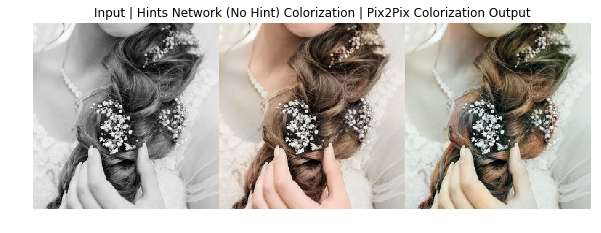

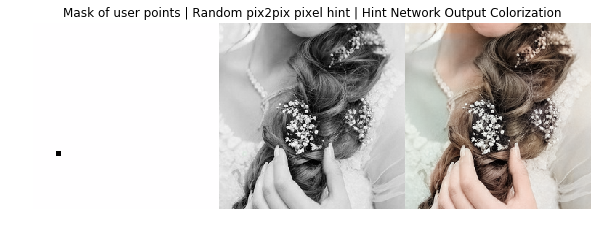

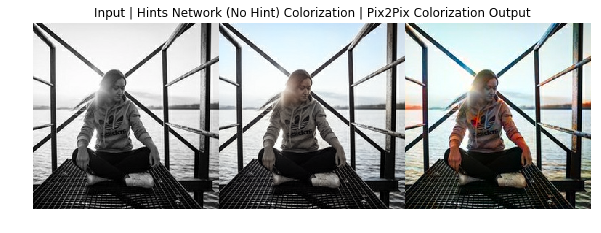

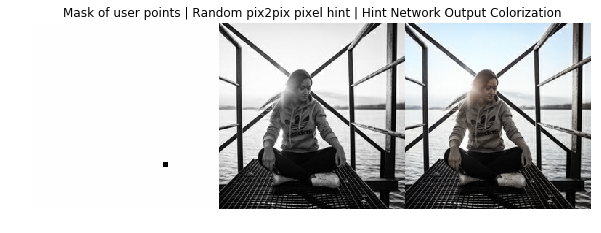

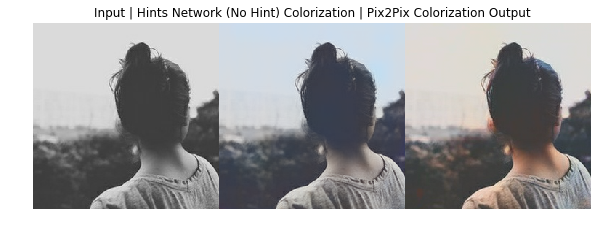

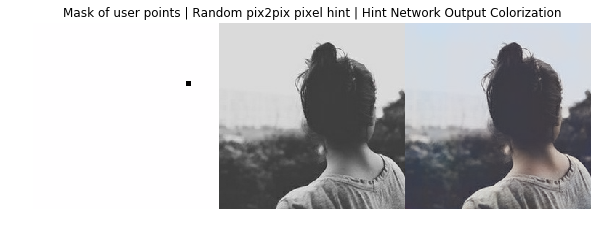

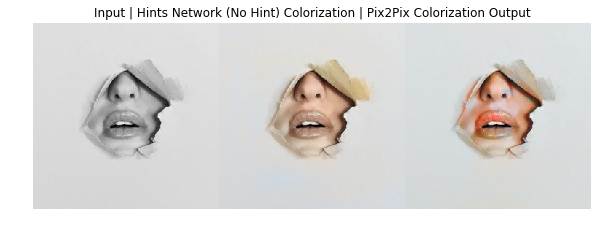

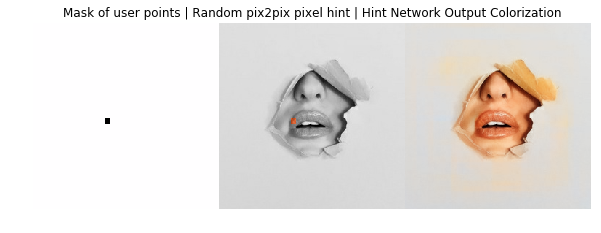

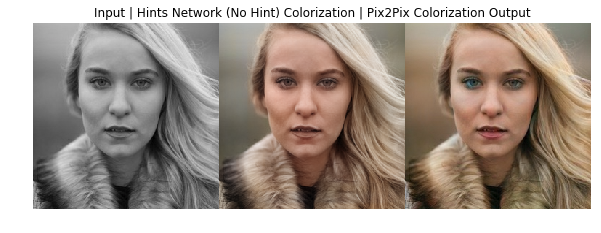

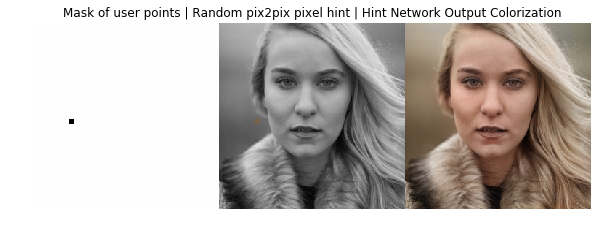

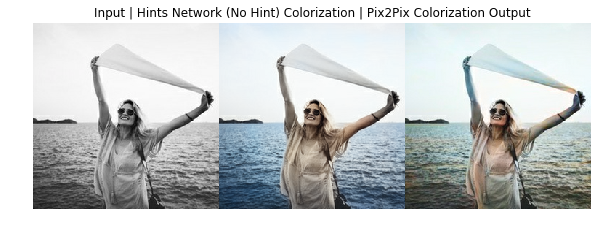

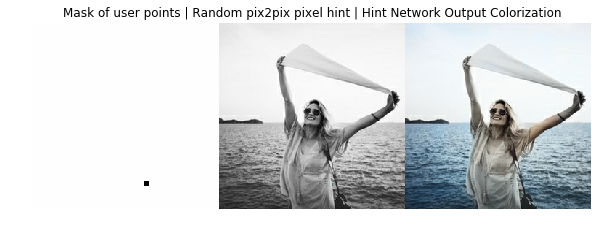

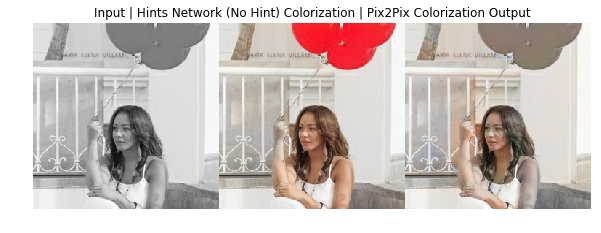

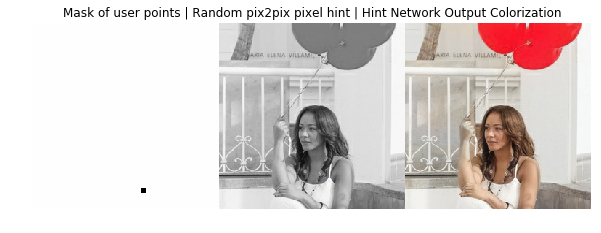

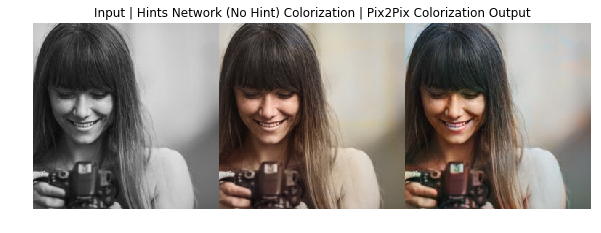

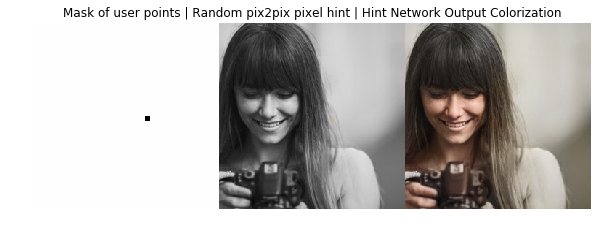

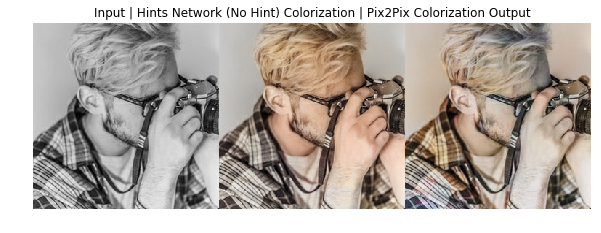

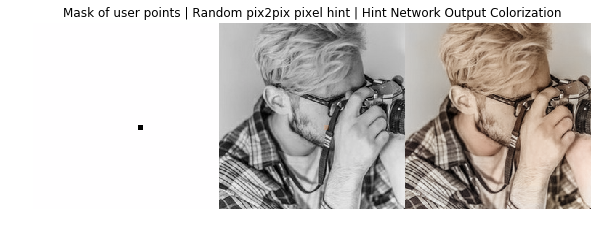

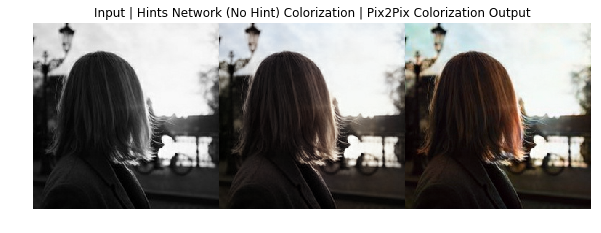

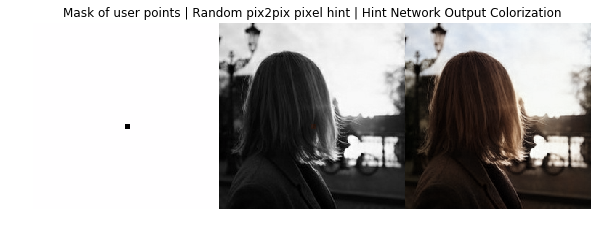

In [5]:
import matplotlib.image as mpimg
from PIL import Image

count = 0

for img in allimgs2read:
    print(img)
    # Load the image
    img_type = '-targets.png'
    img_url = './images/' + img
    pix2pix_output = Image.open(img_url + '-outputs.png')
    colorModel.load_image(img_url+'-targets.png') # load an image

    mask = np.zeros((1,256,256)) # giving no user points, so mask is all 0's
    input_ab = np.zeros((2,256,256)) # ab values of user points, default to 0 for no input
    img_out = colorModel.net_forward(input_ab,mask) # run model, returns 256x256 image

    img_gray_fullres = colorModel.get_img_gray_fullres() # get grayscale image at fullresolution
    img_out_fullres = colorModel.get_img_fullres() # get image at full resolution


    
    # show result
    plt.figure(figsize=(10,6))
    plt.imshow(np.concatenate((img_gray_fullres,img_out_fullres, pix2pix_output),axis=1)); plt.axis('off');
    plt.title('Input | Hints Network (No Hint) Colorization | Pix2Pix Colorization Output')
    def put_point(input_ab,mask,loc,p,val):
        # input_ab    2x256x256    current user ab input (will be updated)
        # mask        1x256x256    binary mask of current user input (will be updated)
        # loc         2 tuple      (h,w) of where to put the user input
        # p           scalar       half-patch size
        # val         2 tuple      (a,b) value of user input
        input_ab[:,loc[0]-p:loc[0]+p+1,loc[1]-p:loc[1]+p+1] = np.array(val)[:,np.newaxis,np.newaxis]
        mask[:,loc[0]-p:loc[0]+p+1,loc[1]-p:loc[1]+p+1] = 1
        return (input_ab,mask)

    # get random pixel hint from colored output of pix2pix
    from skimage import io, color
    import random
    rgb = io.imread(img_url+'-outputs.png')
    lab = color.rgb2lab(rgb)
    
    l, a, b = 0, 0, 0
    pixel_found = False
    count1 = 0
    while not pixel_found:
        x,y = random.randint(0,len(lab)-1), random.randint(0,len(lab[0])-1)
        random_pix2pix_output_loc = [x,y]
        pixel = list(lab[x][y])
        l = pixel[0]
        a = pixel[1]
        b = pixel[1]
        count1 += 1
        if count1 == 1000:
            pixel_found = True
            random_pix2pix_output_loc = [x,y]
            random_pix2pix_output_hint = list(lab[x][y])[1:]
        if l>50 and l<80:
            if a**2+b**2>2500:
                print("FOUND IT BOI")
                pixel_found = True
                random_pix2pix_output_loc = [x,y]
                random_pix2pix_output_hint = list(lab[x][y])[1:]

    #print(random_pix2pix_output_loc,random_pix2pix_output_hint)

    # initialize with no user inputs
    input_ab = np.zeros((2,256,256))
    mask = np.zeros((1,256,256))

    # add a random point to the image
    (input_ab,mask) = put_point(input_ab,mask,random_pix2pix_output_loc,3,random_pix2pix_output_hint)
    
        
#     x,y = random.randint(0,len(lab)-1), random.randint(0,len(lab[0])-1)
#     random_pix2pix_output_loc2 = [x,y]
#     random_pix2pix_output_hint2 = list(lab[x][y])[1:]
#     (input_ab,mask) = put_point(input_ab,mask,random_pix2pix_output_loc2,3,random_pix2pix_output_hint2)

    # call forward
    img_out = colorModel.net_forward(input_ab,mask)

    # get mask, input image, and result in full resolution
    mask_fullres = colorModel.get_img_mask_fullres() # get input mask in full res
    img_in_fullres = colorModel.get_input_img_fullres() # get input image in full res
    img_out_fullres = colorModel.get_img_fullres() # get image at full resolution

    # show user input, along with output
    plt.figure(figsize=(10,6))
    plt.imshow(np.concatenate((mask_fullres,img_in_fullres,img_out_fullres),axis=1));
    plt.title('Mask of user points | Random pix2pix pixel hint | Hint Network Output Colorization')
    plt.axis('off');
    count +=1
    if count == 10:
        break
plt.show()

photo-1481068164146-e8beb686f4d2
found it boi
photo-1491759683820-492a6de5504c
found it boi
dcc2ccd9
found it boi
photo-1498842812179-c81beecf902c
found it boi
photo-1481077147437-4b5f9bb774df
found it boi
photo-1491818689676-f257892134ef
found it boi
photo-1415769663272-8504c6cc02b3
found it boi
photo-1499167998325-c2980f5cb329
found it boi
photo-1481141726884-014a1f27d993
found it boi
photo-1491864402166-274ee7bfc5f7
found it boi


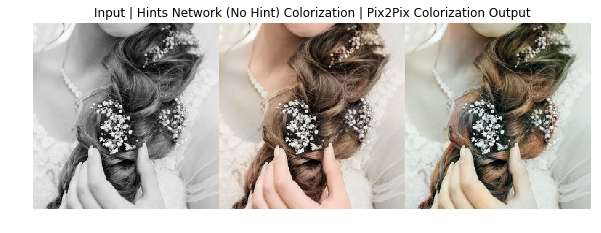

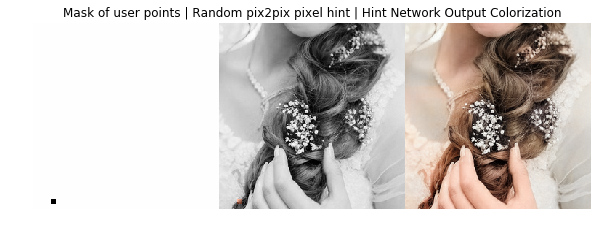

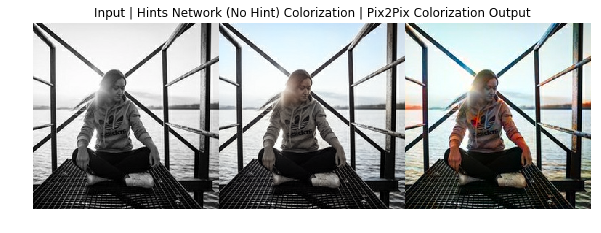

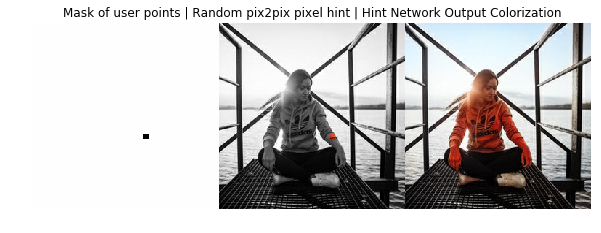

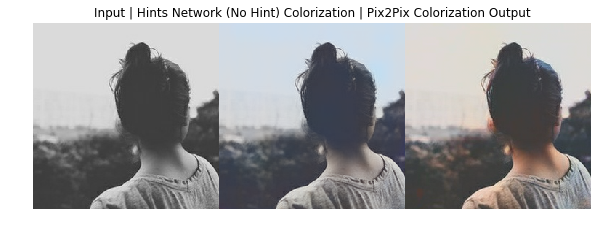

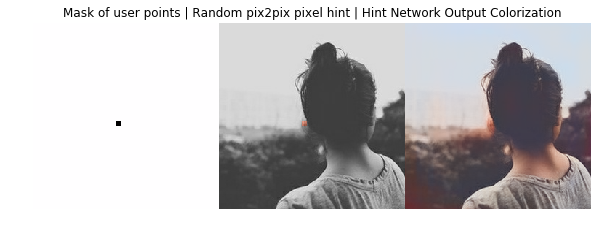

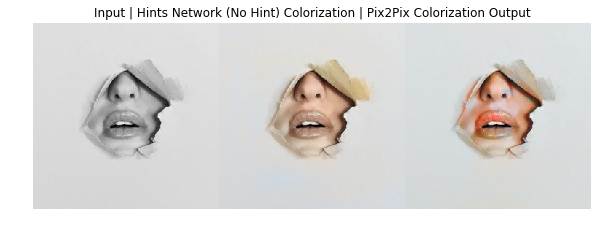

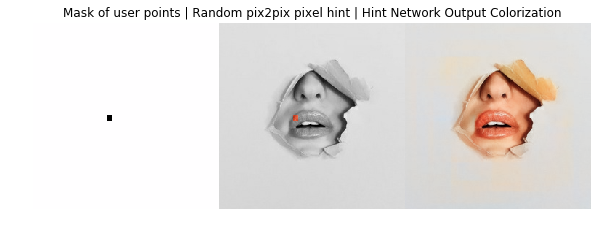

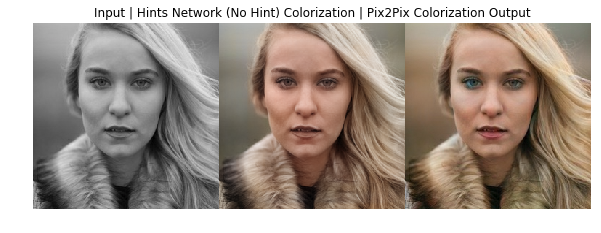

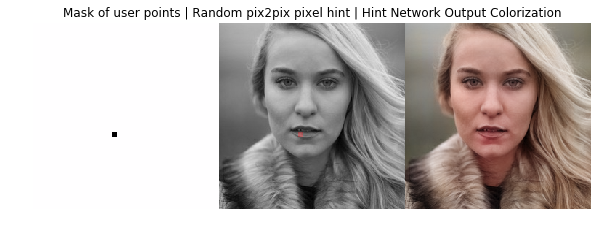

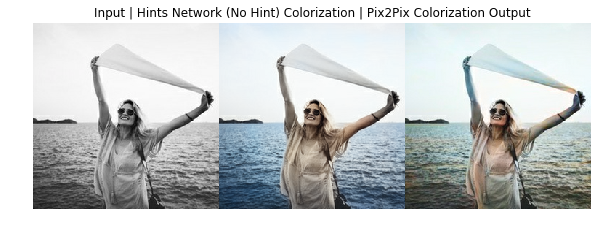

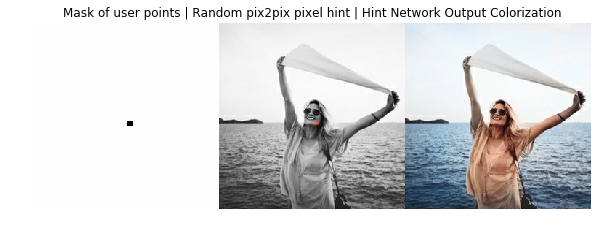

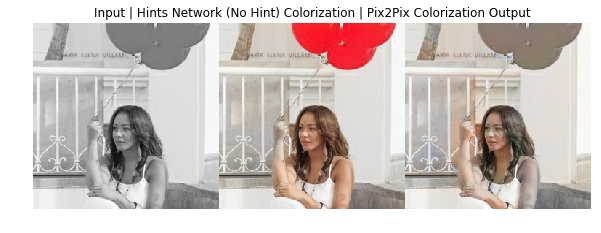

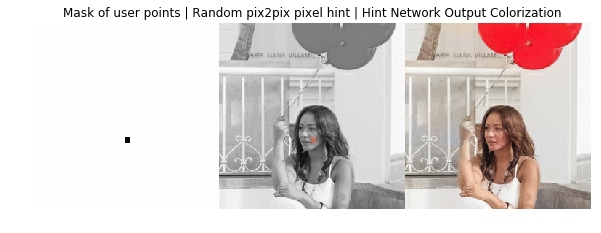

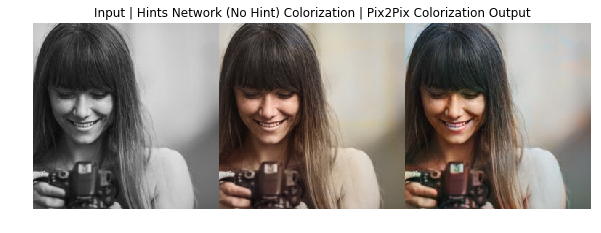

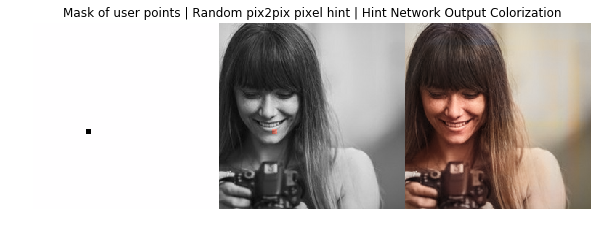

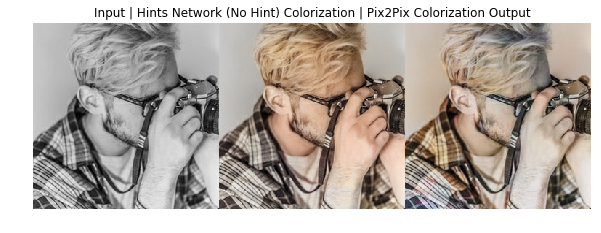

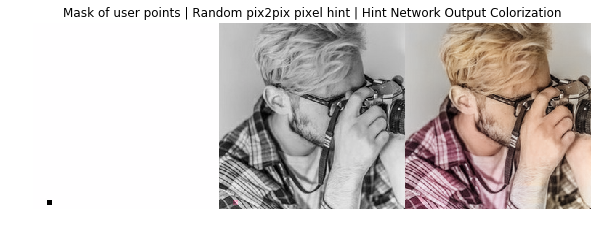

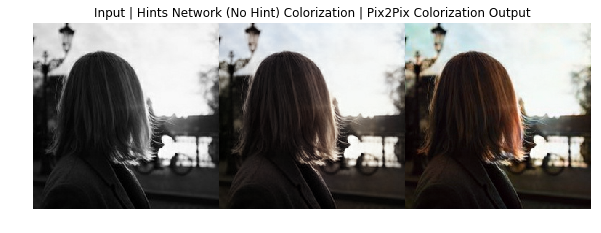

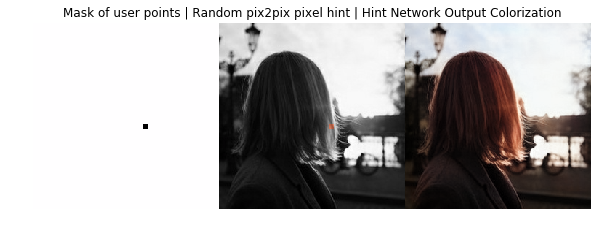

In [11]:
import matplotlib.image as mpimg
from PIL import Image

count = 0

for img in allimgs2read:
    print(img)
    # Load the image
    img_type = '-targets.png'
    img_url = './images/' + img
    pix2pix_output = Image.open(img_url + '-outputs.png')
    colorModel.load_image(img_url+'-targets.png') # load an image

    mask = np.zeros((1,256,256)) # giving no user points, so mask is all 0's
    input_ab = np.zeros((2,256,256)) # ab values of user points, default to 0 for no input
    img_out = colorModel.net_forward(input_ab,mask) # run model, returns 256x256 image

    img_gray_fullres = colorModel.get_img_gray_fullres() # get grayscale image at fullresolution
    img_out_fullres = colorModel.get_img_fullres() # get image at full resolution


    
    # show result
    plt.figure(figsize=(10,6))
    plt.imshow(np.concatenate((img_gray_fullres,img_out_fullres, pix2pix_output),axis=1)); plt.axis('off');
    plt.title('Input | Hints Network (No Hint) Colorization | Pix2Pix Colorization Output')
    def put_point(input_ab,mask,loc,p,val):
        # input_ab    2x256x256    current user ab input (will be updated)
        # mask        1x256x256    binary mask of current user input (will be updated)
        # loc         2 tuple      (h,w) of where to put the user input
        # p           scalar       half-patch size
        # val         2 tuple      (a,b) value of user input
        input_ab[:,loc[0]-p:loc[0]+p+1,loc[1]-p:loc[1]+p+1] = np.array(val)[:,np.newaxis,np.newaxis]
        mask[:,loc[0]-p:loc[0]+p+1,loc[1]-p:loc[1]+p+1] = 1
        return (input_ab,mask)

    # get random pixel hint from colored output of pix2pix
    from skimage import io, color
    import random
    rgb = io.imread(img_url+'-outputs.png')
    lab = color.rgb2lab(rgb)
    
    l, a, b = 0, 0, 0
    pixel_found = False
    chroma = 0
    for x in range(len(lab)):
        for y in range(len(lab[x])):
            pixel = list(lab[x][y])
            l = pixel[0]
            a = pixel[1]
            b = pixel[1]
            chroma_check = a**2+b**2
            if l>50 and l<80:
                if chroma_check > chroma:
                    chroma = chroma_check
                    pixel_found = True
                    random_pix2pix_output_loc = [x,y]
                    random_pix2pix_output_hint = list(lab[x][y])[1:]

    if pixel_found == False:
        print("sad bois")
        x,y = random.randint(0,len(lab)-1), random.randint(0,len(lab[0])-1)
        random_pix2pix_output_loc = [x,y]
        random_pix2pix_output_hint = list(lab[x][y])[1:]
    else:
        print("found it boi")
    #print(random_pix2pix_output_loc,random_pix2pix_output_hint)

    # initialize with no user inputs
    input_ab = np.zeros((2,256,256))
    mask = np.zeros((1,256,256))

    # add a random point to the image
    (input_ab,mask) = put_point(input_ab,mask,random_pix2pix_output_loc,3,random_pix2pix_output_hint)
    
        
#     x,y = random.randint(0,len(lab)-1), random.randint(0,len(lab[0])-1)
#     random_pix2pix_output_loc2 = [x,y]
#     random_pix2pix_output_hint2 = list(lab[x][y])[1:]
#     (input_ab,mask) = put_point(input_ab,mask,random_pix2pix_output_loc2,3,random_pix2pix_output_hint2)

    # call forward
    img_out = colorModel.net_forward(input_ab,mask)

    # get mask, input image, and result in full resolution
    mask_fullres = colorModel.get_img_mask_fullres() # get input mask in full res
    img_in_fullres = colorModel.get_input_img_fullres() # get input image in full res
    img_out_fullres = colorModel.get_img_fullres() # get image at full resolution

    # show user input, along with output
    plt.figure(figsize=(10,6))
    plt.imshow(np.concatenate((mask_fullres,img_in_fullres,img_out_fullres),axis=1));
    plt.title('Mask of user points | Random pix2pix pixel hint | Hint Network Output Colorization')
    plt.axis('off');
    count +=1
    if count == 10:
        break
plt.show()

In [10]:
import matplotlib.image as mpimg
from PIL import Image
import cv2

count = 0

def find_pixel(lab, xs_prev, ys_prev):
    l, a, b = 0, 0, 0
    pixel_found = False
    chroma = 0
    x_found, y_found = 0,0
    for x in range(len(lab)):
        for y in range(len(lab[x])):
            pls_continue = False
            if len(xs_prev)!=0 and len(xs_prev)!=0:
                for i in range(len(xs_prev)):
                    if (abs(x-xs_prev[i])/256.0<.1 or abs(y-ys_prev[i])/256.0<.1):
                        pls_continue = True
                        
            if not pls_continue:
                pixel = list(lab[x][y])
                l = pixel[0]
                a = pixel[1]
                b = pixel[2]
                chroma_check = a**2+b**2
                if l>40 and l<85:
                    if chroma_check > chroma:
                        #print(x,y)
                        chroma = chroma_check
                        pixel_found = True
                        x_found, y_found = x, y

    return x_found, y_found 
    
def choose_pixels(input_ab, mask, lab, count):
    xs,ys = [],[]
    x, y = 0, 0
    locs, hints = [],[]
    for i in range(count):
        x, y = find_pixel(lab, xs, ys)
        #print("x and y are", x, y)
        xs.append(x)
        ys.append(y)
    #print(xs, ys)
    for i in range(len(xs)):
        x = xs[i]
        y = ys[i]
        if x==0 and y==0:
            continue
        else:
            pix2pix_output_loc = [x,y]
            pix2pix_output_hint = list(lab[x][y])[1:]
            locs.append(pix2pix_output_loc)
            hints.append(pix2pix_output_hint)
    return locs, hints
        

for img in allimgs2read:
#     if count == 11:
#         break
    print(img)
    # Load the image
    img_type = '-targets.png'
    img_url = './images/' + img
    pix2pix_output = Image.open(img_url + '-outputs.png')
    colorModel.load_image(img_url+'-targets.png') # load an image

    mask = np.zeros((1,256,256)) # giving no user points, so mask is all 0's
    input_ab = np.zeros((2,256,256)) # ab values of user points, default to 0 for no input
    img_out = colorModel.net_forward(input_ab,mask) # run model, returns 256x256 image

    img_gray_fullres = colorModel.get_img_gray_fullres() # get grayscale image at fullresolution
    img_out_fullres = colorModel.get_img_fullres() # get image at full resolution


    
    # show result
#     plt.figure(figsize=(10,6))
#     plt.imshow(np.concatenate((img_gray_fullres,img_out_fullres, pix2pix_output),axis=1)); plt.axis('off');
#     plt.title('Input | Hints Network (No Hint) Colorization | Pix2Pix Colorization Output')
    def put_point(input_ab,mask,loc,p,val):
        # input_ab    2x256x256    current user ab input (will be updated)
        # mask        1x256x256    binary mask of current user input (will be updated)
        # loc         2 tuple      (h,w) of where to put the user input
        # p           scalar       half-patch size
        # val         2 tuple      (a,b) value of user input
        input_ab[:,loc[0]-p:loc[0]+p+1,loc[1]-p:loc[1]+p+1] = np.array(val)[:,np.newaxis,np.newaxis]
        mask[:,loc[0]-p:loc[0]+p+1,loc[1]-p:loc[1]+p+1] = 1
        return (input_ab,mask)

    # get random pixel hint from colored output of pix2pix
    from skimage import io, color
    import random
    rgb = io.imread(img_url+'-outputs.png')
    lab = color.rgb2lab(rgb)
    


#     if pixel_found == False:
#         print("sad bois")
#         x,y = random.randint(0,len(lab)-1), random.randint(0,len(lab[0])-1)
#         random_pix2pix_output_loc = [x,y]
#         random_pix2pix_output_hint = list(lab[x][y])[1:]
#     else:
#         print("found it boi")
    #print(random_pix2pix_output_loc,random_pix2pix_output_hint)

    # initialize with no user inputs
    input_ab = np.zeros((2,256,256))
    mask = np.zeros((1,256,256))

    locs, hints = choose_pixels(input_ab, mask, lab, 5)
    # add a random point to the image
    #(input_ab,mask) = put_point(input_ab,mask,random_pix2pix_output_loc,3,random_pix2pix_output_hint)
    
    for i in range(len(locs)):
        (input_ab,mask) = put_point(input_ab,mask,locs[i],1,hints[i])
        
#     x,y = random.randint(0,len(lab)-1), random.randint(0,len(lab[0])-1)
#     random_pix2pix_output_loc2 = [x,y]
#     random_pix2pix_output_hint2 = list(lab[x][y])[1:]
#     (input_ab,mask) = put_point(input_ab,mask,random_pix2pix_output_loc2,3,random_pix2pix_output_hint2)

    # call forward
    img_out = colorModel.net_forward(input_ab,mask)

    # get mask, input image, and result in full resolution
    mask_fullres = colorModel.get_img_mask_fullres() # get input mask in full res
    img_in_fullres = colorModel.get_input_img_fullres() # get input image in full res
    img_out_fullres = colorModel.get_img_fullres() # get image at full resolution

    # show user input, along with output
#     plt.figure(figsize=(10,6))
#     plt.imshow(np.concatenate((mask_fullres,img_in_fullres,img_out_fullres),axis=1));
#     plt.title('Mask of user points | Random pix2pix pixel hint | Hint Network Output Colorization')
#     plt.axis('off');

#     TO SAVE
    result = Image.fromarray(img_out_fullres, mode='RGB')
    result.save(img_url + "-5hints.png")
    print(count)
    count+=1
    
plt.show()

photo-1481068164146-e8beb686f4d2
0
photo-1491759683820-492a6de5504c
1
dcc2ccd9
2
photo-1498842812179-c81beecf902c
3
photo-1481077147437-4b5f9bb774df
4
photo-1491818689676-f257892134ef
5
photo-1415769663272-8504c6cc02b3
6
photo-1499167998325-c2980f5cb329
7
photo-1481141726884-014a1f27d993
8
photo-1491864402166-274ee7bfc5f7
9
photo-1417721885406-d31aee8c2a79
10
photo-1499380773094-a77393174c74
11
photo-1481898745049-701120a81a13
12
photo-1492031215329-791748ee1253
13
photo-1428930377079-45a584b6dd6b
14
photo-1499509816521-41db018b336f
15
photo-1482117050945-43fd39c9b0b5
16
photo-1492127778108-a6cef62534f4
17
photo-1428932021471-d172cfe9955b
18
photo-1499552442814-13341b4aed72
19
photo-1482240475066-6726e69ccc9e
20
photo-1492288991661-058aa541ff43
21
photo-1429117257281-73c32df3dcdc
22
photo-1499635691429-48c98bb6a91b
23
photo-1482264851290-446b18e3ee9f
24
photo-1492558499962-5eb469b12d93
25
photo-1429280064633-adb9d2bea577
26
photo-1499782196839-2dba4127b622
27
photo-1482555670981-4de159

225
photo-1471575266009-b52cd3a488c8
226
photo-1503716096171-62f96ac8d7a9
227
photo-1489015024470-9847bf52b0b6
228
photo-1496361264444-f0d580d778ee
229
photo-1472531136082-6f1a8fd2b6c8
230
photo-1503777445385-248405269e85
231
photo-1489178460338-20d73689dd54
232
photo-1496361328949-40f91ca2fcef
233
photo-1472849676747-48a51c0c30b6
234
photo-1503946156290-eb57cd299fd2
235
photo-1489389290809-733bc8a5ba43
236
photo-1496419395660-3a2d917a68c0
237
photo-1473162514202-2b7b5c7ad82f
238
photo-1503970611626-3a300b9a9e9c
239
photo-1489548364432-37c031c0a5bf
240
photo-1496499354870-877088652a58
241
photo-1473283297248-4a5c0b5fad7f
242
photo-1504022100155-0605968da8af
243
photo-1489673446964-e1f989187ddc
244
photo-1496787861170-7c8901ee5b41
245
photo-1473433025194-381637d4c01f
246
photo-1504038866189-02d54c1d0b9e
247
photo-1489727291017-7cd681a5efcc
248
photo-1496827779898-37fde9f89dc6
249
photo-1473458387542-25eae8ee1345
250
photo-1504214301781-a86d8f2aab44
251
photo-1489742969195-f06de4fbd810
2